## Lab 4

### import library and tools function

In [1]:
# import nesscessary library
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from sklearn import cluster


### Question 1. Watershed

[[128. 127. 126. ...   0.   0.   0.]
 [128. 127. 126. ...   0.   0.   0.]
 [128. 127. 126. ...   0.   0.   0.]
 ...
 [120. 119. 118. ...   0.   0.   0.]
 [120. 119. 118. ...   0.   0.   0.]
 [120. 119. 118. ...   0.   0.   0.]]


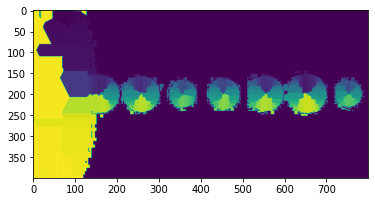

In [8]:
def watershed_processing(): 
    image = cv2.imread('./images/planets.jpg')
    # Generate an initial image with two overlapping circles
    # conver img to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # calculate the distance transform of the image
    distance = ndi.distance_transform_edt(image)
    print(distance)
    # print(distance)
    coords = peak_local_max(distance, footprint=np.ones((5,5)), labels = image)
    # generate the markers
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    # perform watershed on the image
    labels = watershed(-distance, markers, mask=image, compactness=0.001)

    plt.imshow(labels)
    cv2.imwrite('images/watershed_result.jpg', labels)
    return labels

image_watershed = watershed_processing()

### Question 2. Meanshift

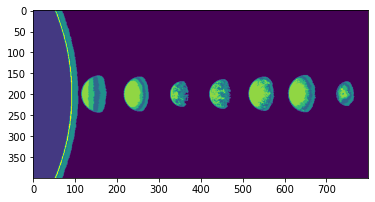

In [9]:
def meanshilt_processing():
    image = cv2.imread('./images/planets.jpg')
    flatten_image = np.array(image)[:, :, :3]
    
    R = flatten_image[:, :, 0]
    G = flatten_image[:, :, 1]
    B = flatten_image[:, :, 2]

    shape = R.shape
    color_sample = np.column_stack([R.flatten(), G.flatten(), B.flatten()])
    bandwidth = cluster.estimate_bandwidth(color_sample, quantile=0.2, n_samples=500)

    clf = MeanShift(bandwidth = bandwidth, bin_seeding= True)
    labels = clf.fit_predict(color_sample).reshape(shape)
    plt.imshow(labels)
    cv2.imwrite('images/meanshift_result.jpg', labels)
    return labels

image_meanshift = meanshilt_processing()

### plot pictures

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 9), sharex=True, sharey=True)
ax = axes.ravel()
image = cv2.imread('./images/planets.jpg')

ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(image_watershed)
ax[1].set_title('Watershed')
ax[2].imshow(image_meanshift)
ax[2].set_title('Meanshift')

TypeError: Image data of dtype object cannot be converted to float